<img align="right" width="400" src="https://www.fhnw.ch/de/++theme++web16theme/assets/media/img/fachhochschule-nordwestschweiz-fhnw-logo.svg" alt="FHNW Logo">


# Hugginface Pipelines

by Fabian Märki

## Summary
The aim of this notebook is to illustrate Huggingface's [pipelines](https://huggingface.co/docs/transformers/main_classes/pipelines) which simplify many [tasks](https://huggingface.co/docs/transformers/main_classes/pipelines#transformers.pipeline.task) (for disciplines like nlp, vision etc.) to just a few lines of code (i.e. the easy way to use Transformers models for inference).

## Links

- [Huggingface pipelines](https://huggingface.co/docs/transformers/main_classes/pipelines)

This notebook contains assigments: <font color='red'>Questions are written in red.</font>

<a href="https://colab.research.google.com/github/markif/2024_HS_CAS_NLP_LAB_Notebooks/blob/master/06_a_Huggingface_Pipelines.ipynb">
  <img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

In [1]:
%%capture

# this will take a while
!pip install timm

We need this lib for Object Detection (see below)
### !!! After installing timm you need to restart your runtime !!!

In [2]:
%%capture

!pip install transformers

In [1]:
%%capture

!pip install 'fhnw-nlp-utils>=0.10.0,<0.11.0'

from fhnw.nlp.utils.storage import download

import pandas as pd
import numpy as np

**Make sure that a GPU is available (see [here](https://www.tutorialspoint.com/google_colab/google_colab_using_free_gpu.htm))!!!**

In [2]:
from fhnw.nlp.utils.system import set_log_level
from fhnw.nlp.utils.system import system_info

set_log_level()
print(system_info())

2024-11-08 15:01:05.142233: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-11-08 15:01:05.157390: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-11-08 15:01:05.161994: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


OS name: posix
Platform name: Linux
Platform release: 6.8.0-47-generic
Python version: 3.11.0rc1
CPU cores: 6
RAM: 31.11GB total and 25.44GB available
Tensorflow version: 2.17.0
GPU is available
GPU is a NVIDIA GeForce RTX 2070 with Max-Q Design with 8192MiB


/usr/local/lib/python3.11/dist-packages/pynvml/smi.py:5: FutureWarning: The pynvml.smi module is deprecated and will be removed in the next release of pynvml. Please use pynvml_utils:
(e.g. `from pynvml_utils import nvidia_smi`)
  warnings.warn(


In [3]:
from fhnw.nlp.utils.transformers import get_compute_device

device = get_compute_device()
print(device)

cuda:0


## NLP: Sentiment Analysis

In [4]:
from transformers import pipeline

texts = ["Dies ist ein guter Arzt", "Dies ist ein schlechter Arzt", "Der Arzt untersucht den Patienten"]

In [5]:
sentiment_analyzer = pipeline("sentiment-analysis", device=device)

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

In [6]:
sentiments = sentiment_analyzer(texts)

print(sentiments)

[{'label': 'NEGATIVE', 'score': 0.9548131227493286}, {'label': 'NEGATIVE', 'score': 0.5888152122497559}, {'label': 'NEGATIVE', 'score': 0.9604743123054504}]


<font color='red'>**TASK: Hm, this result is not that great. Let's go to Huggingface's [model page](https://huggingface.co/models) and look for a model that is better suited for our task.**</font>

Parameters that might be important are: 
- the language (german i.e. **multilingual**)
- the task (**sentiment** analysis)

Look for these components in the name of the model.

In [7]:
sentiment_model_name = "your_model_name"

In [8]:
sentiment_analyzer = pipeline("sentiment-analysis", model=sentiment_model_name, device=device)

config.json:   0%|          | 0.00/953 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/669M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/39.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/872k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

In [9]:
sentiments = sentiment_analyzer(texts)

print(sentiments)

[{'label': '5 stars', 'score': 0.5351049900054932}, {'label': '1 star', 'score': 0.7070897817611694}, {'label': '4 stars', 'score': 0.35365885496139526}]


It is also possible to specify which model version to use. It can be a branch name, a tag name, or a commit id (revision can be any identifier allowed by git since huggingface uses a git-based system for storing models).

In [10]:
reversion = "edd66ab"

In [11]:
sentiment_analyzer = pipeline("sentiment-analysis", model=sentiment_model_name, revision=reversion, device=device)

In [12]:
sentiments = sentiment_analyzer(texts)

print(sentiments)

[{'label': '5 stars', 'score': 0.5351049900054932}, {'label': '1 star', 'score': 0.7070897817611694}, {'label': '4 stars', 'score': 0.35365885496139526}]


Let's have a look at the model config in order to get an understanding of e.g. the label mapping.

In [13]:
print(sentiment_analyzer.model.config)

BertConfig {
  "_name_or_path": "nlptown/bert-base-multilingual-uncased-sentiment",
  "_num_labels": 5,
  "architectures": [
    "BertForSequenceClassification"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "directionality": "bidi",
  "finetuning_task": "sentiment-analysis",
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "id2label": {
    "0": "1 star",
    "1": "2 stars",
    "2": "3 stars",
    "3": "4 stars",
    "4": "5 stars"
  },
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "label2id": {
    "1 star": 0,
    "2 stars": 1,
    "3 stars": 2,
    "4 stars": 3,
    "5 stars": 4
  },
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "output_past": true,
  "pad_token_id": 0,
  "pooler_fc_size": 768,
  "pooler_num_attention_heads": 12,
  "pooler_num_fc_layers": 3,
  "pooler_size_per_head": 128,
  "pooler_type": "first_to

## NLP: Zero-Shot Classification

Further links that might be of interesst:
- [What is Zero-Shot Classification](https://huggingface.co/tasks/zero-shot-classification)
- [Zero-Shot Text Classification](https://huggingface.co/docs/setfit/how_to/zero_shot)

In [14]:
from transformers import pipeline

zero_shot_classifier = pipeline("zero-shot-classification", device=device)

No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/1.15k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

In [15]:
zero_shot_sentiments = zero_shot_classifier(texts, candidate_labels=["positive", "neutral", "negative"])

print(zero_shot_sentiments)

[{'sequence': 'Dies ist ein guter Arzt', 'labels': ['positive', 'neutral', 'negative'], 'scores': [0.8260242342948914, 0.1707538217306137, 0.003222034778445959]}, {'sequence': 'Dies ist ein schlechter Arzt', 'labels': ['negative', 'positive', 'neutral'], 'scores': [0.9975566864013672, 0.0012798379175364971, 0.001163504202850163]}, {'sequence': 'Der Arzt untersucht den Patienten', 'labels': ['neutral', 'positive', 'negative'], 'scores': [0.35218390822410583, 0.3506319522857666, 0.2971840798854828]}]


## NLP: Audio Transcription

Further links that might be of interesst:
- Huggingface's [course on audio](https://huggingface.co/learn/audio-course/chapter5/introduction)
- [Whisper](https://huggingface.co/docs/transformers/model_doc/whisper)
- [Creating a Voice Assistant](https://huggingface.co/learn/audio-course/chapter7/voice-assistant) that transcribes your microphone input
- [Record Audio in a Jupyter Notebook](https://medium.com/@harrycblum/record-audio-in-a-jupyter-notebook-da08a88278bb)

In [16]:
%%capture

!apt-get update
!apt-get -y install ffmpeg

In [17]:
download("https://drive.switch.ch/index.php/s/rWX752RRlXxGxNc/download", "data/colors.mp3")
download("https://drive.switch.ch/index.php/s/LzhtTs2nNl8L8nV/download", "data/dinner.flac")
download("https://drive.switch.ch/index.php/s/YiT4MKYnAfU0epn/download", "data/dream.flac")

In [18]:
%%time
%%capture

!pip install torchaudio

CPU times: user 14.8 ms, sys: 22.8 ms, total: 37.7 ms
Wall time: 3.01 s


In [19]:
import torch
from transformers import pipeline

transcriber_model_name = "openai/whisper-tiny.en"

In [20]:
transcriber = pipeline("automatic-speech-recognition", model=transcriber_model_name, return_timestamps=True, torch_dtype=torch.float16, device=device)

config.json:   0%|          | 0.00/1.94k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/151M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/1.62k [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/805 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/798k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.41M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

normalizer.json:   0%|          | 0.00/52.7k [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/34.6k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/1.83k [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/185k [00:00<?, ?B/s]

In [21]:
transcription_colors = transcriber("data/colors.mp3")

print(transcription_colors)
print(transcription_colors["text"])

/usr/local/lib/python3.11/dist-packages/transformers/models/whisper/generation_whisper.py:483: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(
The attention mask is not set and cannot be inferred from input because pad token is same as eos token.As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.


{'text': " colors. Red is a vibrant color. Roses are sometimes red. Blood is red. White is the color of snow. Clouds are very often white. Blue is the color of the sky and the ocean. Black isn't really a color at all. Tare is black, a crow is black. Green is the color of grass. It is also the color of leaves on the trees in the summer. Brown is the color of dirt. Many people have brown hair. Yellow is a bright color. Most people use yellow when they draw a picture of the sun. Orange is an easy color to remember. That is because an orange is orange. Pink is the color that we dress baby girls in. We dress baby boys in blue. Purple is the color of some bilets. The Canadian flag is red and white. What color is your flag?"}
 colors. Red is a vibrant color. Roses are sometimes red. Blood is red. White is the color of snow. Clouds are very often white. Blue is the color of the sky and the ocean. Black isn't really a color at all. Tare is black, a crow is black. Green is the color of grass. It

In [22]:
transcription_dinner = transcriber("data/dinner.flac")

print(transcription_dinner["text"])

 He hoped there would be stew for dinner, turnips and carrots and bruised potatoes and fat-mutton pieces to be ladled out and thick, peppered flower-fattened sauce.


/usr/local/lib/python3.11/dist-packages/transformers/models/whisper/generation_whisper.py:483: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(


In [23]:
transcription_dream = transcriber("data/dream.flac")

print(transcription_dream["text"])

 I have a dream that one day this nation will rise up live out the true meaning of its creed


/usr/local/lib/python3.11/dist-packages/transformers/models/whisper/generation_whisper.py:483: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(


In [24]:
transcriptions_en = [transcription_colors["text"], transcription_dinner["text"], transcription_dream["text"]]

You can swap the model with any [Whisper checkpoint](https://huggingface.co/models?other=whisper&sort=downloads) on the Hugging Face Hub (i.e. a bigger model might result in better transcripts) or use one of the [most downloaded automatic speech recognition models](https://huggingface.co/models?pipeline_tag=automatic-speech-recognition&sort=trending).

## NLP: Translation

Further links that might be of interesst:
- Huggingface's [course on translation](https://huggingface.co/learn/nlp-course/chapter7/4?fw=pt)
- [Translation task](https://huggingface.co/docs/transformers/tasks/translation)

In [25]:
from transformers import pipeline

translator_en_de = pipeline("translation_en_to_de", device=device)

No model was supplied, defaulted to google-t5/t5-base and revision 686f1db (https://huggingface.co/google-t5/t5-base).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/1.21k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/892M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.39M [00:00<?, ?B/s]

In [26]:
translations_de = translator_en_de(transcriptions_en)

In [27]:
print(translations_de)

[{'translation_text': 'Rot ist eine leuchtende Farbe. Rosen sind manchmal rot. Blut ist rot. Weiß ist die Farbe von Schnee. Wolken sind oft weiß. Blau ist die Farbe des Himmels und des Ozeans. Schwarz ist gar keine Farbe. Tare ist schwarz, eine Krähe ist schwarz.'}, {'translation_text': 'Er hoffte, es gäbe zum Abendessen Eintopf, Turnips und Karotten, zerrissene Kartoffeln und fettige Schweinestücke, die ausgefüllt werden und eine dicke, pflückte, blumengefärbte Soße.'}, {'translation_text': 'Ich träume davon, dass diese Nation eines Tages auferstehen und die wahre Bedeutung ihres Glaubens ausleben wird.'}]


In [28]:
print(transcriptions_en)

[" colors. Red is a vibrant color. Roses are sometimes red. Blood is red. White is the color of snow. Clouds are very often white. Blue is the color of the sky and the ocean. Black isn't really a color at all. Tare is black, a crow is black. Green is the color of grass. It is also the color of leaves on the trees in the summer. Brown is the color of dirt. Many people have brown hair. Yellow is a bright color. Most people use yellow when they draw a picture of the sun. Orange is an easy color to remember. That is because an orange is orange. Pink is the color that we dress baby girls in. We dress baby boys in blue. Purple is the color of some bilets. The Canadian flag is red and white. What color is your flag?", ' He hoped there would be stew for dinner, turnips and carrots and bruised potatoes and fat-mutton pieces to be ladled out and thick, peppered flower-fattened sauce.', ' I have a dream that one day this nation will rise up live out the true meaning of its creed']


## NLP: Text to Speech

Further links that might be of interesst:
- [Text to Speech Task](https://huggingface.co/docs/transformers/tasks/text-to-speech)
- [Audio Course](https://huggingface.co/learn/audio-course/chapter6/introduction)
- [How to Clone a Voice](https://github.com/myshell-ai/OpenVoice/blob/main/demo_part3.ipynb) (see also [here](https://huggingface.co/myshell-ai/OpenVoice) and [here](https://huggingface.co/microsoft/speecht5_tts))

In [29]:
from transformers import pipeline

text_to_speech = pipeline("text-to-speech", model="suno/bark-small", device=device)

config.json:   0%|          | 0.00/8.80k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.68G [00:00<?, ?B/s]

/usr/local/lib/python3.11/dist-packages/torch/nn/utils/weight_norm.py:143: FutureWarning: `torch.nn.utils.weight_norm` is deprecated in favor of `torch.nn.utils.parametrizations.weight_norm`.
  WeightNorm.apply(module, name, dim)
/usr/local/lib/python3.11/dist-packages/transformers/models/encodec/modeling_encodec.py:120: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.register_buffer("padding_total", torch.tensor(kernel_size - stride, dtype=torch.int64), persistent=False)


generation_config.json:   0%|          | 0.00/4.91k [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/353 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/996k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.92M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

In [30]:
text = "[clears throat] This is a test ... and I just took a long pause."

output = text_to_speech(text)

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:10000 for open-end generation.


In [31]:
from IPython.display import Audio

Audio(output["audio"], rate = output["sampling_rate"])

<font color='red'>**TASK: Go to [Huggingface pipelines](https://huggingface.co/docs/transformers/main_classes/pipelines) and try a pipeline of your own interest.**</font>

## Vision: Object Detection

Further links that might be of interesst:
- [Object Detection](https://huggingface.co/docs/transformers/tasks/object_detection)

In [32]:
%%capture

# in case you did not install it before (see above - do not forget to restart your runtime)
# !pip install timm

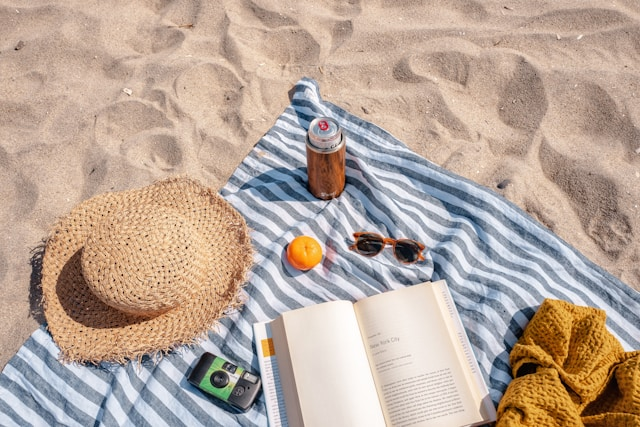

In [33]:
from transformers import pipeline
from PIL import Image, ImageDraw
from fhnw.nlp.utils.transformers import get_compute_device
from fhnw.nlp.utils.storage import download

device = get_compute_device()

download("https://drive.switch.ch/index.php/s/s2iXNIsmashuQxa/download", "data/sandy_beach.jpg")

image = Image.open("data/sandy_beach.jpg")
image

In [34]:
object_detector = pipeline("object-detection", device=device)

No model was supplied, defaulted to facebook/detr-resnet-50 and revision 2729413 (https://huggingface.co/facebook/detr-resnet-50).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/4.59k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/167M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/102M [00:00<?, ?B/s]

Some weights of the model checkpoint at facebook/detr-resnet-50 were not used when initializing DetrForObjectDetection: ['model.backbone.conv_encoder.model.layer1.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer2.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer3.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer4.0.downsample.1.num_batches_tracked']
- This IS expected if you are initializing DetrForObjectDetection from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DetrForObjectDetection from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


preprocessor_config.json:   0%|          | 0.00/290 [00:00<?, ?B/s]

In [35]:
detected_objects = object_detector(image)

print(detected_objects)

[{'score': 0.9821104407310486, 'label': 'bottle', 'box': {'xmin': 303, 'ymin': 119, 'xmax': 345, 'ymax': 200}}, {'score': 0.9880583882331848, 'label': 'bed', 'box': {'xmin': 0, 'ymin': 1, 'xmax': 639, 'ymax': 422}}, {'score': 0.5137529373168945, 'label': 'cell phone', 'box': {'xmin': 183, 'ymin': 351, 'xmax': 262, 'ymax': 413}}, {'score': 0.9811086058616638, 'label': 'orange', 'box': {'xmin': 286, 'ymin': 236, 'xmax': 323, 'ymax': 271}}, {'score': 0.9934701919555664, 'label': 'book', 'box': {'xmin': 252, 'ymin': 279, 'xmax': 497, 'ymax': 425}}]


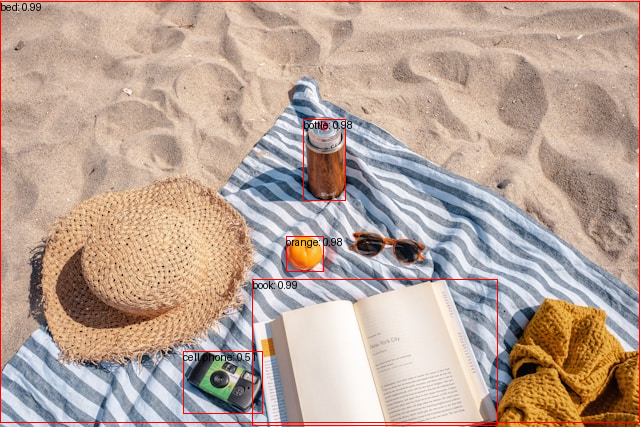

In [36]:
draw = ImageDraw.Draw(image)

for prediction in detected_objects:
    box = prediction["box"]
    label = prediction["label"]
    score = prediction["score"]

    xmin, ymin, xmax, ymax = box.values()
    draw.rectangle((xmin, ymin, xmax, ymax), outline="red", width=1)
    draw.text((xmin, ymin), f"{label}: {round(score,2)}", fill="black")

image

## Vision: Zero-Shot Object Detection

Further links that might be of interesst:
- [Zero-Shot Object Detection](https://huggingface.co/docs/transformers/tasks/zero_shot_object_detection)

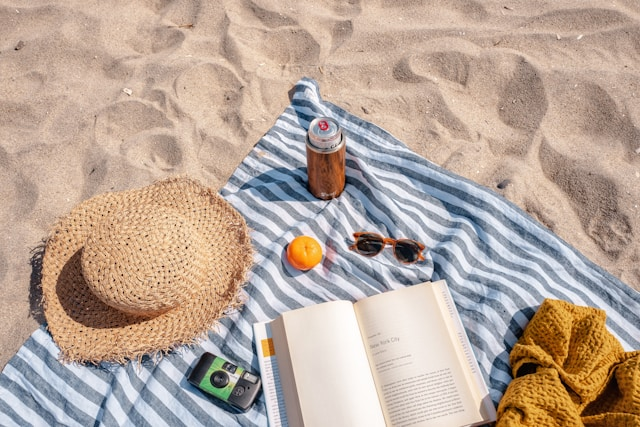

In [37]:
from transformers import pipeline
from PIL import Image, ImageDraw

download("https://drive.switch.ch/index.php/s/s2iXNIsmashuQxa/download", "data/sandy_beach.jpg")

image = Image.open("data/sandy_beach.jpg")
image

In [38]:
zero_shot_object_detector = pipeline(task="zero-shot-object-detection", model="google/owlv2-base-patch16-ensemble", device=device)

config.json:   0%|          | 0.00/414 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/620M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.10k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/67.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/121 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/425 [00:00<?, ?B/s]

In [39]:
detected_objects = zero_shot_object_detector(image, candidate_labels=["hat", "book", "sunglasses", "camera"])

print(detected_objects)

[{'score': 0.6862495541572571, 'label': 'camera', 'box': {'xmin': 187, 'ymin': 352, 'xmax': 262, 'ymax': 411}}, {'score': 0.6229882836341858, 'label': 'book', 'box': {'xmin': 259, 'ymin': 279, 'xmax': 495, 'ymax': 427}}, {'score': 0.6050182580947876, 'label': 'sunglasses', 'box': {'xmin': 349, 'ymin': 232, 'xmax': 425, 'ymax': 264}}, {'score': 0.49752700328826904, 'label': 'hat', 'box': {'xmin': 39, 'ymin': 175, 'xmax': 252, 'ymax': 370}}, {'score': 0.12933407723903656, 'label': 'camera', 'box': {'xmin': 222, 'ymin': 361, 'xmax': 237, 'ymax': 374}}, {'score': 0.10158709436655045, 'label': 'hat', 'box': {'xmin': 77, 'ymin': 183, 'xmax': 238, 'ymax': 319}}]


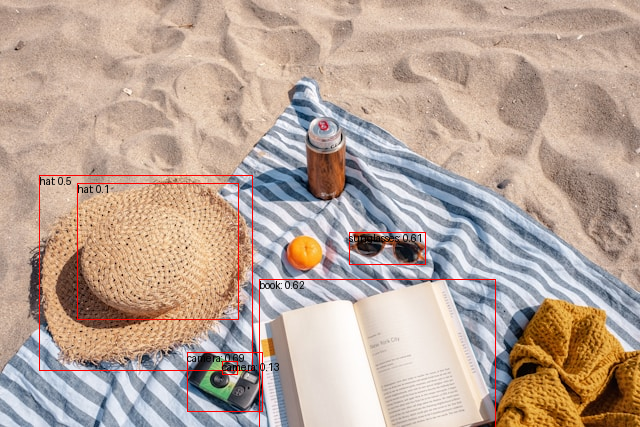

In [40]:
draw = ImageDraw.Draw(image)

for prediction in detected_objects:
    box = prediction["box"]
    label = prediction["label"]
    score = prediction["score"]

    xmin, ymin, xmax, ymax = box.values()
    draw.rectangle((xmin, ymin, xmax, ymax), outline="red", width=1)
    draw.text((xmin, ymin), f"{label}: {round(score,2)}", fill="black")

image

## Vision: Image Segmentation

Further links that might be of interesst:
- [Image Segmentation 1](https://huggingface.co/docs/transformers/main_classes/pipelines#transformers.ImageSegmentationPipeline)
- [Image Segmentation 1](https://huggingface.co/docs/transformers/main/en/tasks/semantic_segmentation)

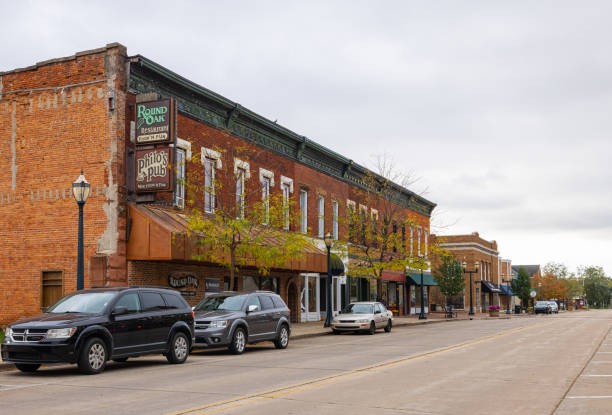

In [41]:
from transformers import pipeline
from PIL import Image

download("https://drive.switch.ch/index.php/s/Lnehm84kb1A1ekg/download", "data/cars_parking.jpg")

image = Image.open("data/cars_parking.jpg")
image

In [42]:
semantic_segmentation = pipeline("image-segmentation", "nvidia/segformer-b1-finetuned-cityscapes-1024-1024", device=device)
results = semantic_segmentation(image)
results

config.json:   0%|          | 0.00/1.68k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/54.8M [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/273 [00:00<?, ?B/s]

[{'score': None,
  'label': 'road',
  'mask': <PIL.Image.Image image mode=L size=612x415>},
 {'score': None,
  'label': 'sidewalk',
  'mask': <PIL.Image.Image image mode=L size=612x415>},
 {'score': None,
  'label': 'building',
  'mask': <PIL.Image.Image image mode=L size=612x415>},
 {'score': None,
  'label': 'wall',
  'mask': <PIL.Image.Image image mode=L size=612x415>},
 {'score': None,
  'label': 'pole',
  'mask': <PIL.Image.Image image mode=L size=612x415>},
 {'score': None,
  'label': 'traffic sign',
  'mask': <PIL.Image.Image image mode=L size=612x415>},
 {'score': None,
  'label': 'vegetation',
  'mask': <PIL.Image.Image image mode=L size=612x415>},
 {'score': None,
  'label': 'terrain',
  'mask': <PIL.Image.Image image mode=L size=612x415>},
 {'score': None,
  'label': 'sky',
  'mask': <PIL.Image.Image image mode=L size=612x415>},
 {'score': None,
  'label': 'car',
  'mask': <PIL.Image.Image image mode=L size=612x415>}]

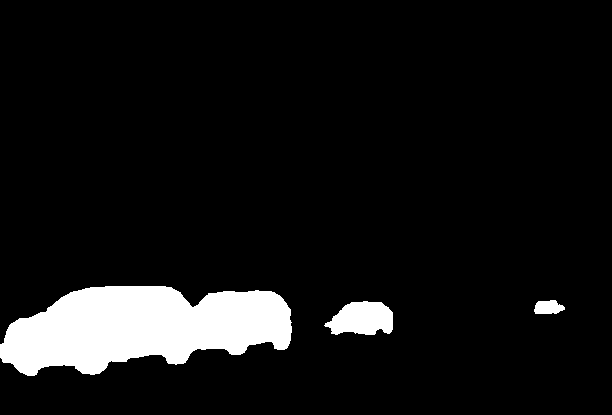

In [43]:
results[-1]["mask"]